## **Diseño de un experimiento: Relación entre consumo de pan integral y peso.**

El presente experimento busca evaluar si el consumo de **pan integral** tiene un efecto en el **peso corporal** de una persona. Para ello se diseñó un estudio con dos grupos de participantes durante un mes:

- **Grupo control**: consumió pan blanco (tipo marraqueta).  
- **Grupo experimental**: consumió pan integral.  

Se registró el peso corporal de cada participante al inicio y al final del período, con el objetivo de analizar los cambios en el peso y comparar los resultados entre ambos grupos.

Además, se recopilaron variables adicionales —edad, género, ingesta calórica diaria, pasos por día y adherencia a la dieta— con el fin de considerar posibles factores de confusión y enriquecer el análisis estadístico.

##### **Hipótesis**

- **Hipótesis nula (H0):** No existe una diferencia significativa en el cambio de peso entre quienes consumen pan integral y quienes consumen pan blanco. 
- **Hipótesis alternativa (H1):** Existe una diferencia significativa en el cambio de peso entre quienes consumen pan integral y quienes consumen pan blanco.   

**Nota:** El conjunto de datos utilizado es simulado y fue creado únicamente con fines de aprendizaje y práctica.

### **Preparación y limpieza de los datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Importando Datos
df = pd.read_csv('experimento_pan_ES.csv')
df.head()

,participante_id,grupo,tipo_pan,genero,edad,peso_pre_kg,peso_post_kg,ingesta_calorica_kcal,pasos_por_dia,adherencia_dieta_pct,cambio_peso_kg
0,1,Control,Marraqueta,Femenino,46,78.4,78.7,2443,8375,100.0,0.3
1,2,Control,Marraqueta,Femenino,26,77.9,79.0,2254,3307,91.6,1.1
2,3,Control,Marraqueta,Femenino,33,61.4,62.2,2133,7926,92.2,0.8
3,4,Control,Marraqueta,Femenino,31,57.1,57.0,2030,11178,91.6,-0.1
4,5,Control,Marraqueta,Femenino,20,70.7,71.0,2617,11454,92.9,0.3


In [3]:
# Resumen estadístico del dataframe. Se evalua si existen valores atipicos en las columnas númericas. 
df.describe()

,participante_id,edad,peso_pre_kg,peso_post_kg,ingesta_calorica_kcal,pasos_por_dia,adherencia_dieta_pct,cambio_peso_kg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,100.500000,42.640000,74.420000,73.949000,2252.165000,7762.375000,91.98350,-0.471000
std,57.879185,14.143926,10.450231,10.564513,310.407121,2487.597926,3.82458,1.185702
min,1.000000,18.000000,48.600000,48.900000,1448.000000,3012.000000,77.20000,-3.800000
25%,50.750000,30.000000,67.800000,67.075000,2060.250000,5699.250000,89.70000,-1.300000
50%,100.500000,42.000000,74.550000,74.450000,2255.000000,7937.500000,91.90000,-0.500000
75%,150.250000,56.000000,81.225000,80.800000,2427.250000,9947.000000,94.50000,0.400000
max,200.000000,65.000000,101.000000,101.400000,3004.000000,11986.000000,100.00000,2.000000


In [4]:
# Se verifica los tipos de datos en las columnas y si existen valores nulos en estas.   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participante_id        200 non-null    int64  
 1   grupo                  200 non-null    object 
 2   tipo_pan               200 non-null    object 
 3   genero                 200 non-null    object 
 4   edad                   200 non-null    int64  
 5   peso_pre_kg            200 non-null    float64
 6   peso_post_kg           200 non-null    float64
 7   ingesta_calorica_kcal  200 non-null    int64  
 8   pasos_por_dia          200 non-null    int64  
 9   adherencia_dieta_pct   200 non-null    float64
 10  cambio_peso_kg         200 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 17.3+ KB


In [5]:
# Se verifica si existen filas duplicadas en el data
df.duplicated().sum()

np.int64(0)

In [6]:
# Finalmente se constata que exista la misma cantidad de personas en ambos grupos. 
df['grupo'].value_counts()

grupo
Control         100
Experimental    100
Name: count, dtype: int64

### **Análisis Exploratorio y Descriptivo**

##### **Análisis de variable cambio de peso**

In [7]:
# Promedio de cambio de peso para grupo control y experimental
cambio_peso = df.groupby(['grupo', 'tipo_pan', 'genero'])['cambio_peso_kg'].mean().reset_index()
cambio_peso

,grupo,tipo_pan,genero,cambio_peso_kg
0,Control,Marraqueta,Femenino,0.463462
1,Control,Marraqueta,Masculino,0.408333
2,Experimental,Pan Integral,Femenino,-1.251111
3,Experimental,Pan Integral,Masculino,-1.483636


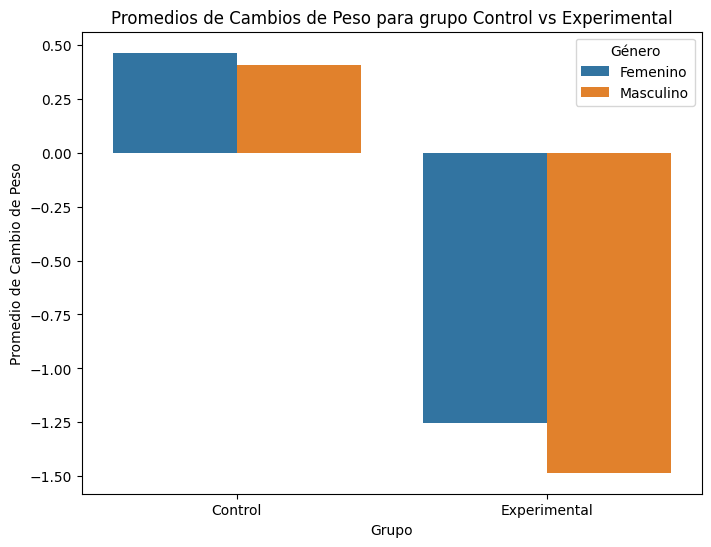

In [8]:
# Gráfico de promedios de cambios de peso para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=cambio_peso, x='grupo', y='cambio_peso_kg', hue='genero')
plt.title("Promedios de Cambios de Peso para grupo Control vs Experimental")
plt.ylabel("Promedio de Cambio de Peso")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

Se observa que el grupo experimental que consumio pan integral, tuvo en promedio una baja de peso tanto en hombres como en mujeres, contrario a lo que ocurrio con el grupo control que tanto en mujeres como hombres experimentaron en promedio una subida de peso, lo que en primeria instacia nos arroja, que existe una relación entre el peso y el tipo de pan que se consume. 

##### **Análisis de variable pasos por día**

In [9]:
# Promedio de pasos por día para grupo control y experimental
pasos_por_dia = df.groupby(['grupo', 'tipo_pan', 'genero'])['pasos_por_dia'].mean().reset_index()
pasos_por_dia

,grupo,tipo_pan,genero,pasos_por_dia
0,Control,Marraqueta,Femenino,8169.634615
1,Control,Marraqueta,Masculino,7820.250000
2,Experimental,Pan Integral,Femenino,7897.933333
3,Experimental,Pan Integral,Masculino,7215.909091


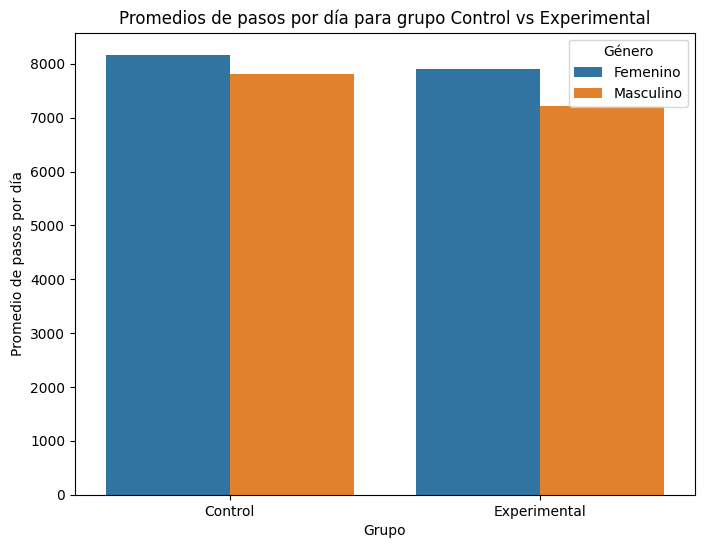

In [10]:
# Grafico promedios de pasos por día para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=pasos_por_dia, x='grupo', y='pasos_por_dia', hue='genero')
plt.title("Promedios de pasos por día para grupo Control vs Experimental")
plt.ylabel("Promedio de pasos por día")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

En cuanto a la variable "pasos por día", que potencialmente podría influir en la variación de peso, se observa que el grupo control tuvo en promedio un mayor nivel de movilidad que el grupo experimental. Sin embargo, pese a registrar una menor cantidad de pasos por día, el grupo experimental presentó una reducción de peso. Esto sugiere que la variable "pasos por día" no sería la principal explicación de la disminución observada, lo que refuerza la hipótesis de que el tipo de pan consumido podría estar influyendo en los resultados.

##### **Análisis de variable ingesta calorica**

In [11]:
# Promedio de ingesta calorica para grupo control y experimental
ingesta_calorica = df.groupby(['grupo', 'tipo_pan', 'genero'])['ingesta_calorica_kcal'].mean().reset_index()
ingesta_calorica

,grupo,tipo_pan,genero,ingesta_calorica_kcal
0,Control,Marraqueta,Femenino,2350.730769
1,Control,Marraqueta,Masculino,2342.854167
2,Experimental,Pan Integral,Femenino,2150.955556
3,Experimental,Pan Integral,Masculino,2162.636364


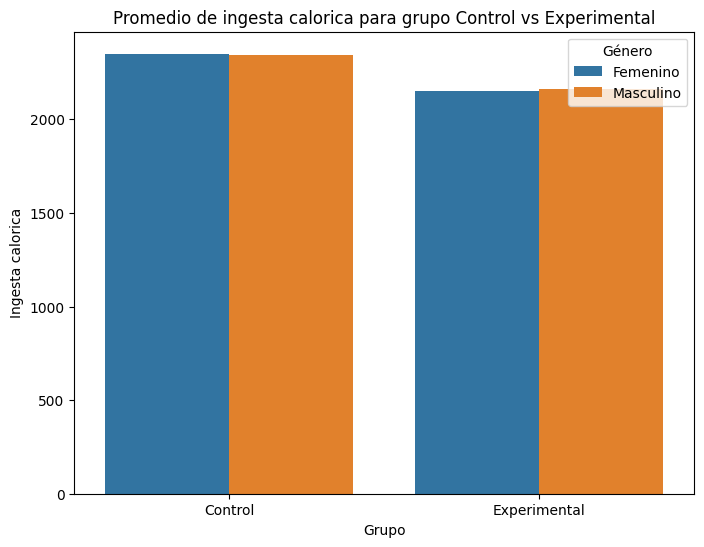

In [12]:
# Grafico promedios de ingesta calorica para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=ingesta_calorica, x='grupo', y='ingesta_calorica_kcal', hue='genero')
plt.title("Promedio de ingesta calorica para grupo Control vs Experimental")
plt.ylabel("Ingesta calorica")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

En cuanto a la ingesta calórica promedio por día, se observa que el grupo control presentó un consumo mayor en comparación con el grupo experimental. Esta diferencia podría estar vinculada al hecho de que el grupo control consumía pan marraqueta, el cual probablemente aporta más calorías que el pan integral consumido por el grupo experimental. Este patrón contribuiría a explicar por qué el grupo control tendió a aumentar de peso, mientras que el experimental mostró una reducción. No obstante, se requiere analizar con mayor detalle la composición calórica de los tipos de pan para confirmar esta relación.

##### **Análisis de variable edad**

In [13]:
# Se crean una variable 'rango_edad' para clasificar a los participantes del experimento por su edad
bins = [18, 29, 42, 54, 65]
labels = ['18-29', '30-42', '43-54', '55-65']
df['rango_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, include_lowest=True)

tabla_edad = df.groupby(['grupo', 'tipo_pan','rango_edad'], observed=True)['cambio_peso_kg'].mean().reset_index()
tabla_edad

,grupo,tipo_pan,rango_edad,cambio_peso_kg
0,Control,Marraqueta,18-29,0.438889
1,Control,Marraqueta,30-42,0.427586
2,Control,Marraqueta,43-54,0.336364
3,Control,Marraqueta,55-65,0.516129
4,Experimental,Pan Integral,18-29,-1.250000
5,Experimental,Pan Integral,30-42,-1.457143
6,Experimental,Pan Integral,43-54,-1.557895
7,Experimental,Pan Integral,55-65,-1.300000


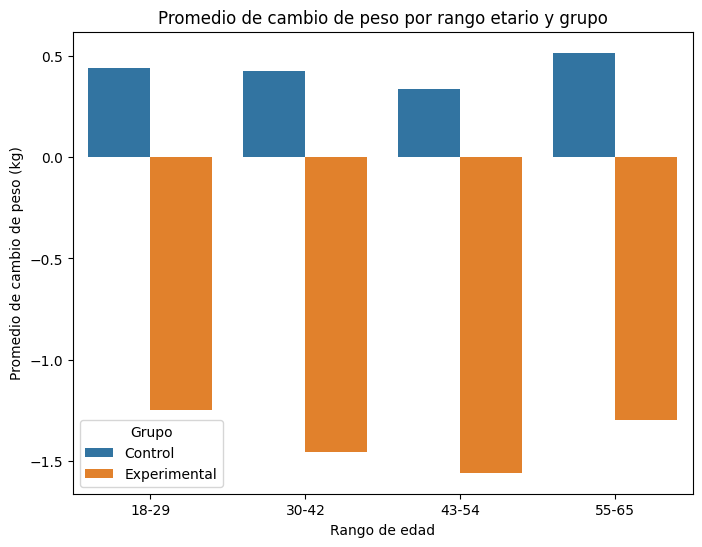

In [14]:
# Gráfico con promedios de cambio de peso por rango etario y grupo
plt.figure(figsize=(8,6))
sns.barplot(data=tabla_edad, x='rango_edad', y='cambio_peso_kg', hue='grupo')
plt.title("Promedio de cambio de peso por rango etario y grupo")
plt.ylabel("Promedio de cambio de peso (kg)")
plt.xlabel("Rango de edad")
plt.legend(title="Grupo")
plt.show()

Al analizar el cambio de peso por rangos etarios, observamos que en todos los grupos de edad los participantes del grupo experimental presentaron una disminución de peso, mientras que los del grupo control aumentaron. Esto sugiere que la edad no es un factor que explique las diferencias de peso observadas entre ambos grupos.

##### **Análisis de variable adherencia a la dieta**

In [15]:
# Promedio de adherencia a dieta para grupo control y experimental
adherencia_dieta = df.groupby(['grupo', 'tipo_pan', 'genero'])['adherencia_dieta_pct'].mean().reset_index()
adherencia_dieta

,grupo,tipo_pan,genero,adherencia_dieta_pct
0,Control,Marraqueta,Femenino,91.817308
1,Control,Marraqueta,Masculino,91.966667
2,Experimental,Pan Integral,Femenino,91.295556
3,Experimental,Pan Integral,Masculino,92.718182


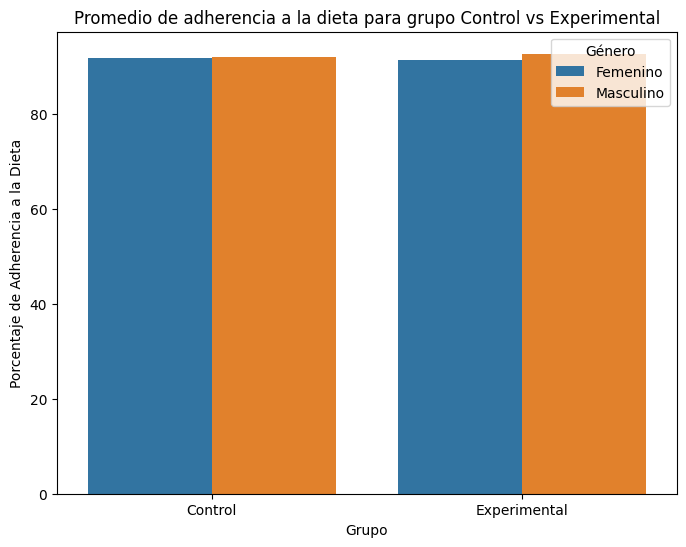

In [16]:
# Grafico de adherencia a la dieta para grupo Control vs Experimental
plt.figure(figsize=(8, 6))
sns.barplot(data=adherencia_dieta, x='grupo', y='adherencia_dieta_pct', hue='genero')
plt.title("Promedio de adherencia a la dieta para grupo Control vs Experimental")
plt.ylabel("Porcentaje de Adherencia a la Dieta")
plt.xlabel("Grupo")
plt.legend(title="Género")
plt.show()

En cuanto a la adherencia a la dieta, se observa que tanto el grupo control como el experimental presentaron porcentajes muy similares (alrededor del 91–92%). Esto indica que la adherencia no explica las diferencias en el cambio de peso entre los grupos, ya que ambos siguieron la dieta con un nivel similar de compromiso.

### Prueba t de student 

Luego de comprobar que, en promedio, las personas del grupo control (que consumieron marraqueta) presentaron un aumento en el peso corporal, mientras que las del grupo experimental (que consumieron pan integral) mostraron una disminución en el peso corporal, se buscara aplicar una prueba t de Student para muestras independientes con el fin de determinar si esta diferencia en el cambio de peso es estadísticamente significativa.

Previamente se verificaran los supuestos que permiten obtener resultados confiables con esta prueba: independencia de las observaciones, normalidad de las distribuciones y homogeneidad de varianzas entre ambos grupos.

- La independencia de las observaciones se cumple, ya que cada individuo pertenece exclusivamente a uno de los grupos y no hay traslape entre ellos.

- En cuanto a la normalidad de las distribuciones, si bien ambas muestras poseen más de 30 observaciones, lo que según la teoría del límite central sugiere que las medias tienden a aproximarse a una distribución normal, se aplicará además la prueba de Shapiro-Wilk y se explorarán histogramas como complemento visual.

- Por último, la homogeneidad de varianzas entre ambos grupos se verificará mediante la prueba de Levene y la inspección de diagramas de caja (boxplots).

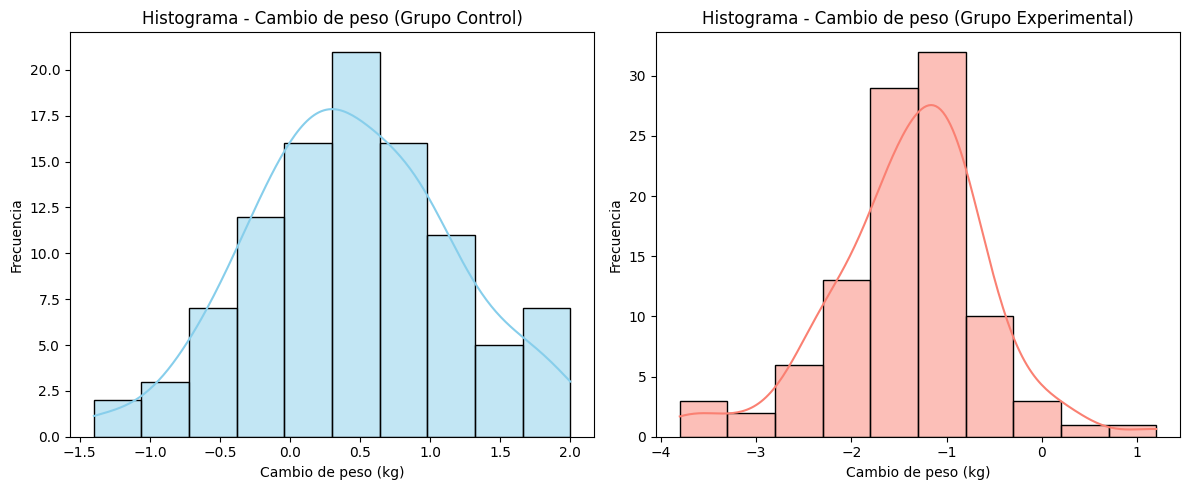

### Prueba de Shapiro-Wilk ###
Grupo Control: estadístico W = 0.9906, p-valor = 0.7159
Grupo Experimental: estadístico W = 0.9670, p-valor = 0.0130



In [17]:
# Análisis de normalidad de las distribuciones entre grupo control y experimental

# Se definen grupo control y experimental
df_grupo_control = df[df['grupo'] == 'Control']
df_grupo_experimental = df[df['grupo'] == 'Experimental']

plt.figure(figsize=(12,5))

# Histograma para grupo control
plt.subplot(1,2,1)
sns.histplot(df_grupo_control['cambio_peso_kg'], bins=10, kde=True, color="skyblue")
plt.title("Histograma - Cambio de peso (Grupo Control)")
plt.xlabel("Cambio de peso (kg)")
plt.ylabel("Frecuencia")

# Histograma para grupo experimental
plt.subplot(1,2,2)
sns.histplot(df_grupo_experimental['cambio_peso_kg'], bins=10, kde=True, color="salmon")
plt.title("Histograma - Cambio de peso (Grupo Experimental)")
plt.xlabel("Cambio de peso (kg)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Prueba de normalidad Shapiro-Wilk 
stat_control, p_control = stats.shapiro(df_grupo_control['cambio_peso_kg'])
stat_exp, p_exp = stats.shapiro(df_grupo_experimental['cambio_peso_kg'])

print("### Prueba de Shapiro-Wilk ###")
print(f"Grupo Control: estadístico W = {stat_control:.4f}, p-valor = {p_control:.4f}")
print(f"Grupo Experimental: estadístico W = {stat_exp:.4f}, p-valor = {p_exp:.4f}\n")



En relación con la normalidad de la distribución, la prueba de Shapiro-Wilk muestra que el grupo control no presenta desviaciones significativas, con un valor W de 0.99 y un p-valor mayor a 0.05, lo que implica que no se rechaza la hipótesis nula de normalidad y que los datos del grupo se ajustan adecuadamente a una distribución normal.

Ahora, respecto al grupo experimental, pese a tener un valor W de 0.96, su valor p menor a 0.05 sugiere que sus datos no siguen estrictamente una distribución normal. No obstante, considerando que ambos grupos cuentan con más de 30 observaciones, la teoría del límite central respalda la robustez del uso de la prueba t de Student aun en presencia de esta desviación, por lo que resulta procedente continuar con el análisis.

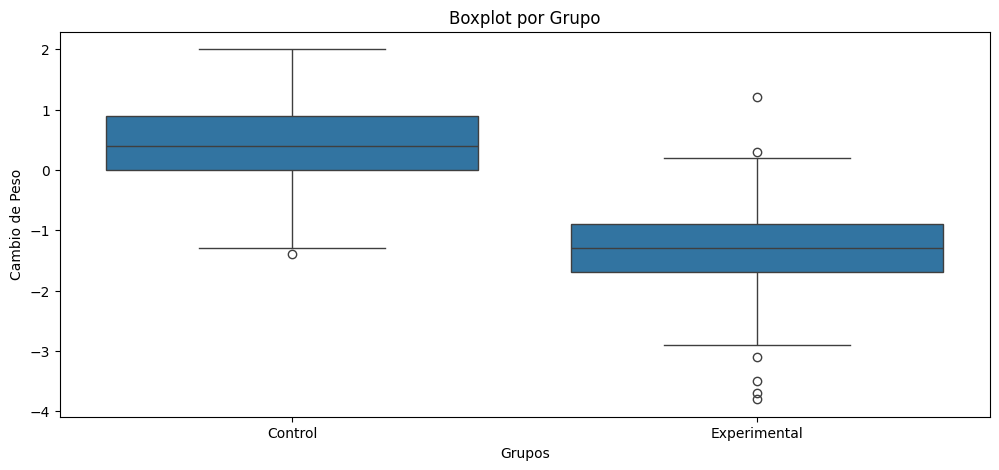

### Prueba de Levene ###
Estadístico = 0.2392, p-valor = 0.6253


In [18]:
# Análisis de homegeneidad de varianzas entre grupo control y experimental

plt.figure(figsize=(12,5))

sns.boxplot(x="grupo", y="cambio_peso_kg", data=df)
plt.title("Boxplot por Grupo")
plt.xlabel("Grupos")
plt.ylabel("Cambio de Peso")
plt.show()

# Prueba de homogeneidad de varianzas (Levene) 
stat_levene, p_levene = stats.levene(df_grupo_control['cambio_peso_kg'], df_grupo_experimental['cambio_peso_kg'])

print("### Prueba de Levene ###")
print(f"Estadístico = {stat_levene:.4f}, p-valor = {p_levene:.4f}")

Respecto a la homogeneidad de las varianzas, el gráfico boxplot sugiere tamaños de cajas similares en ambos grupos, lo que indica una posible homogeneidad. Esta apreciación visual se confirma con la prueba de Levene, cuyo estadístico fue 0.239 con un p-valor de 0.625. Al ser mayor que 0.05, no se rechaza la hipótesis nula, por lo que se concluye que las varianzas entre los grupos pueden considerarse homogéneas.

En consecuencia, tras verificar la independencia de las observaciones, la normalidad de las distribuciones y la homogeneidad de las varianzas, se procede a aplicar la prueba t de Student para muestras independientes.

In [19]:
# Se toman los datos de la variable cambio peso para ambos grupos
cambio_peso_control = df_grupo_control['cambio_peso_kg']
cambio_peso_experimental = df_grupo_experimental['cambio_peso_kg']

# Se aplica prueba t student
t_stat, p_valor = stats.ttest_ind(cambio_peso_control, cambio_peso_experimental)
print("#### Promedios en el Cambio de Peso #####")
print(f"Media del cambio de peso para el grupo control: {df_grupo_control['cambio_peso_kg'].mean():.2f}")
print(f"Media del cambio de peso para el grupo experimental: {df_grupo_experimental['cambio_peso_kg'].mean():.2f}\n")

print("#### Prueba t de Student #####")
print(f"Valor t: {t_stat:.2f}")
print(f"p-valor: {p_valor:.4f}")

#### Promedios en el Cambio de Peso #####
Media del cambio de peso para el grupo control: 0.44
Media del cambio de peso para el grupo experimental: -1.38

#### Prueba t de Student #####
Valor t: 16.86
p-valor: 0.0000


La prueba t de Student para muestras independientes arrojó un valor t de 16.86 con un p-valor menor a 0.001, lo que indica que la diferencia en el cambio de peso corporal entre el grupo control (que aumentó su peso corporal) y el grupo experimental (que lo disminuyó) resulta estadísticamente significativa. En términos prácticos, esta variación no puede atribuirse al azar y sugiere la existencia de una relación relevante entre el tipo de pan consumido y el cambio en el peso corporal, en la medida en que la elección del pan influye de manera diferenciada en la evolución del peso de los participantes.

### Correlaciones de las variables númericas para el grupo control y experimental

Como complemento a la prueba t de Student, se procedió a evaluar, mediante un mapa de correlaciones para cada grupo, si las variables edad, ingesta calórica, pasos diarios y adherencia a la dieta presentan asociaciones relevantes con el cambio de peso en los participantes.

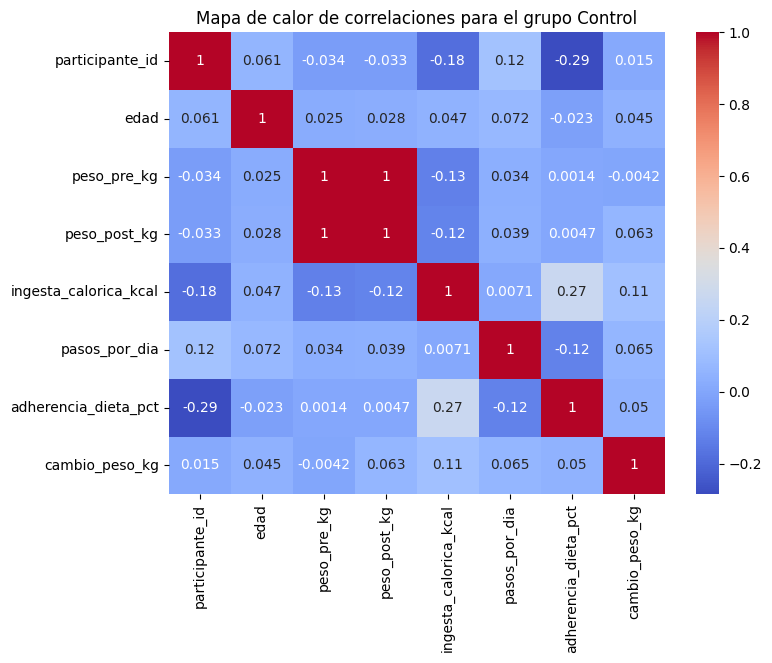

In [20]:
# Grafico de correlaciones para grupo control
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_grupo_control.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlaciones para el grupo Control') 
plt.show()

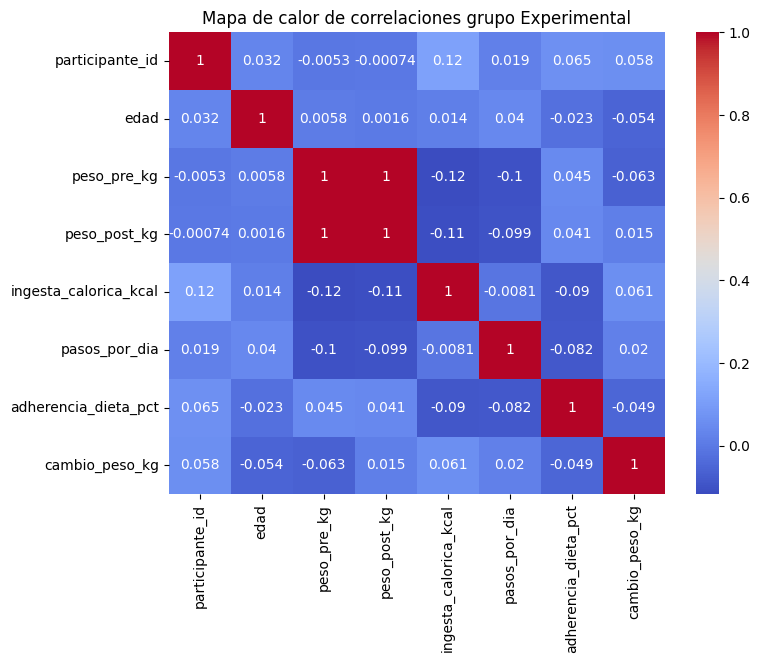

In [21]:
# Grafico de correlaciones para grupo experimental
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_grupo_experimental.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlaciones grupo Experimental')
plt.show()

Los mapas de calor de correlaciones para las variables numéricas, tanto en el grupo control como en el experimental, muestran que ninguna de ellas presenta una asociación fuerte con la variable cambio de peso. Esto indica que factores como edad, ingesta calórica, pasos diarios y adherencia a la dieta no constituyen buenos predictores del cambio de peso en este estudio. En contraste, la diferencia significativa entre los grupos en función del tipo de pan consumido refuerza la hipótesis de que este factor constituye el principal determinante de la variación observada en el peso corporal.

### Conclusiones

Finalmente, podemos concluir que, en el experimento realizado, el consumo de pan integral en lugar de marraqueta tiene un impacto significativo en el cambio de peso corporal. Se observó una diferencia promedio de 1.82 kilos entre ambos grupos durante el periodo evaluado: mientras que el grupo que consumió marraqueta presentó un aumento de 0.44 kilos, el grupo que consumió pan integral registró una reducción de 1.38 kilos.

Asimismo, se analizaron otras variables potencialmente influyentes en el cambio de peso, como la ingesta calórica, los pasos diarios, la edad y la adherencia a la dieta. Sin embargo, ninguna de ellas mostró una correlación significativa con la variable de cambio de peso, ni en el grupo control ni en el experimental.

En consecuencia, respaldados en los resultados de la prueba t de Student —que arrojó una diferencia estadísticamente significativa entre las medias de ambos grupos— es posible rechazar la hipótesis nula y apoyar la hipótesis alternativa, según la cual el tipo de pan consumido influye de manera determinante en el cambio de peso corporal.